# Handwritten Digit Recognition

# Munsif Raza

In [1]:
# Importing Libraries
import os
import cv2 # cv stands for computer vision that is used to load images etc.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Loading dataset
mnist = tf.keras.datasets.mnist

In [3]:
# Splitting data in train test data.
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# Normalizing data to scale features to make every feature value between 1 - 0
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

In [5]:
# Creating model
model = tf.keras.models.Sequential()

In [6]:
# Adding layers in the Neural Network
model.add(tf.keras.layers.Flatten(input_shape=(28,28))) # Flatten layer will flat the data from grid data to flat data.
model.add(tf.keras.layers.Dense(128, activation='relu')) # These layers are to make calculation in the neural network.
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) # Softmax is used to get one result at the end, Single answer.

In [7]:
# Compiling the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Training the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.0180 - accuracy: 0.9940
Epoch 2/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.0146 - accuracy: 0.9951
Epoch 3/10
1875/1875 [==============================] - 1s 739us/step - loss: 0.0147 - accuracy: 0.9950
Epoch 4/10
1875/1875 [==============================] - 1s 743us/step - loss: 0.0123 - accuracy: 0.9958
Epoch 5/10
1875/1875 [==============================] - 1s 748us/step - loss: 0.0115 - accuracy: 0.9959
Epoch 6/10
1875/1875 [==============================] - 1s 742us/step - loss: 0.0103 - accuracy: 0.9966
Epoch 7/10
1875/1875 [==============================] - 1s 744us/step - loss: 0.0094 - accuracy: 0.9969
Epoch 8/10
1875/1875 [==============================] - 1s 743us/step - loss: 0.0087 - accuracy: 0.9969
Epoch 9/10
1875/1875 [==============================] - 1s 746us/step - loss: 0.0093 - accuracy: 0.9965
Epoch 10/10
1875/1875 [==============================] - 1s 746u

In [17]:
# Saving model
model.save('handwritten.model')

INFO:tensorflow:Assets written to: handwritten.model\assets


In [18]:
# Model Evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss is: {loss}")
print(f"Accuracy is: {accuracy}")

313/313 [==============================] - 0s 475us/step - loss: 0.1370 - accuracy: 0.9753
Loss is: 0.1370222121477127
Accuracy is: 0.9753000140190125


This digit is: 1


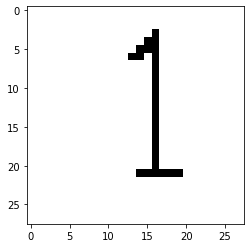

This digit is: 2


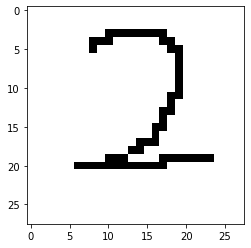

This digit is: 3


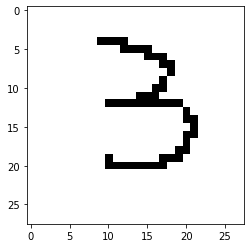

This digit is: 4


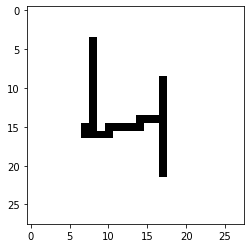

This digit is: 2


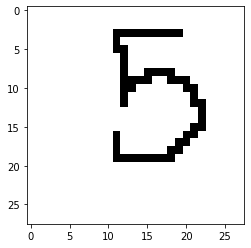

This digit is: 8


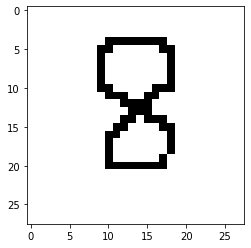

This digit is: 1


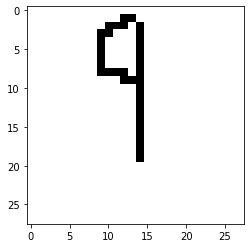

In [20]:
# Using our own data images to predict the model accuracy.
image_number = 1
while os.path.isfile(f"Digits/digit{image_number}.png"):
    try:
        img = cv2.imread(f"Digits/digit{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is: {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error!")
    finally:
        image_number += 1